# **Predicción de cáncer de mama utilizando regresión logística**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/content/breast_cancer.csv')

## **Limpieza de datos**

In [3]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [5]:
#numerical_column_names = data.select_dtypes(include=['number']).columns
#print("Numerical Column Names:", numerical_column_names.tolist())

In [6]:
#object_column_names = data.select_dtypes(include=['object']).columns
#print("Object Column Names:", object_column_names.tolist())

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


In [9]:
print(data[data['Clump Thickness'] == 0].shape)
print(data[data['Uniformity of Cell Size'] == 0].shape)
print(data[data['Uniformity of Cell Shape'] == 0].shape)
print(data[data['Marginal Adhesion'] == 0].shape)
print(data[data['Single Epithelial Cell Size'] == 0].shape)
print(data[data['Bare Nuclei'] == 0].shape)
print(data[data['Bland Chromatin'] == 0].shape)
print(data[data['Normal Nucleoli'] == 0].shape)
print(data[data['Mitoses'] == 0].shape)
print(data[data['Class'] == 0].shape)

(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)


In [10]:
#data =data.loc[(data[['Glucose', 'BloodPressure', 'BMI']] != 0).all(axis=1)]
#data.loc[data['SkinThickness'] == 0, 'SkinThickness'] = data['SkinThickness'].mean()
#data.loc[(data['Insulin'] != 0), 'InsulinKnown'] = 1
#data.loc[(data['Insulin'] == 0), 'InsulinKnown'] = 0

In [11]:
data.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
#data = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       #'DiabetesPedigreeFunction', 'Age', 'InsulinKnown', 'Outcome']]

In [12]:
data.isnull().sum()

,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


In [13]:
data.duplicated().sum()

234

In [14]:
print("Data Size:",data.shape)

Data Size: (683, 10)


In [15]:
cor_mat= data.corr()
cor_mat

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


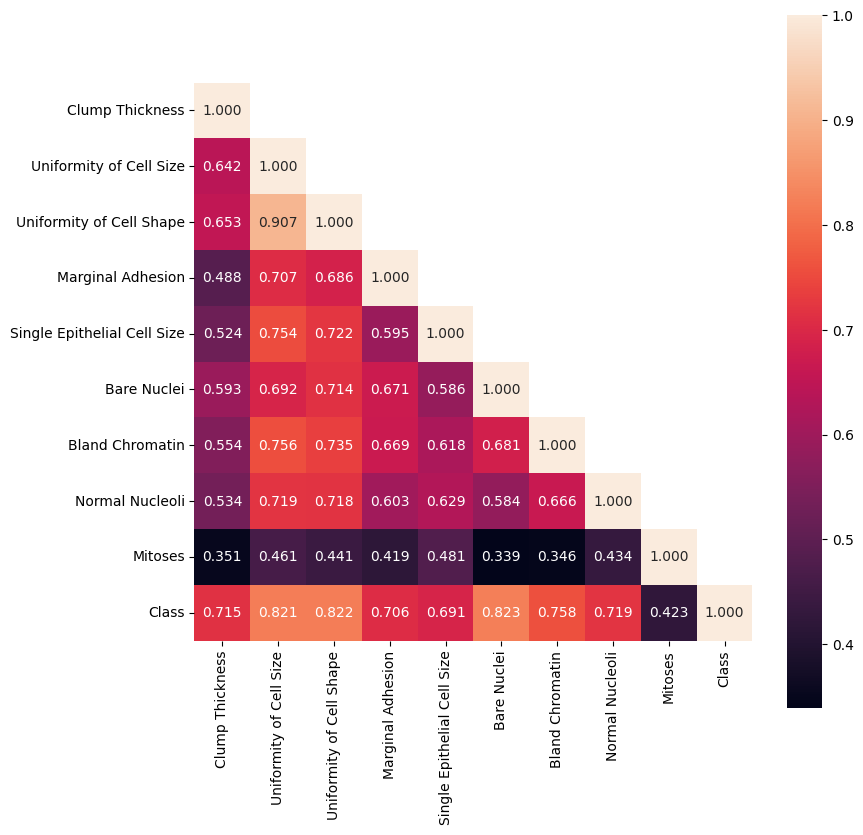

In [16]:
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(9, 9)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True, fmt=".3f")

plt.show()

In [19]:
X = data.drop(['Class'], axis = 1)
y = data['Class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 101)

In [21]:
scaler = RobustScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Entrenamiento**

In [22]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
score = model.score(X_test_scaled, y_test)
score

0.9855072463768116

## **Predicción**

In [24]:
X_train.head(1)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
460,3,1,1,1,2,1,1,1,1


In [25]:
vector_prueba = {
                 'Clump Thickness': 1,
                 'Uniformity of Cell Size': 172,
                 'Uniformity of Cell Shape': 68,
                 'Marginal Adhesion': 49,
                 'Single Epithelial Cell Size': 42.4,
                 'Bare Nuclei': 0.70,
                 'Bland Chromatin': 28,
                 'Normal Nucleoli': 1,
                 'Mitoses': 1}
vector_prueba = pd.DataFrame(vector_prueba, index=[0])
vector_prueba

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1,172,68,49,42.4,0.7,28,1,1


In [26]:
model.predict(vector_prueba)[0]

4